#### import relevant packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [3]:
# nltk.download("wordnet")
# nltk.download("punkt")
# nltk.download("averaged_perceptron_tagger")

#### loading in news dataset

In [4]:
import os 

base_dir = "../data/raw"

texts = []
topics = []

for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    if not os.path.isdir(folder_path):
        continue

    for file_name in os.listdir(folder_path):             # business, politics, entertainment etc..
        file_path = os.path.join(folder_path, file_name)
        
        if not file_name.endswith(".txt"):
            continue

        with open(file_path, 'r', encoding='utf-8', errors = 'ignore') as file:
            texts.append(file.read())  
            topics.append(folder_name)  

In [5]:
df = pd.DataFrame({'text': texts, 'topic': topics})

df.head()

,text,topic
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment
1,"U2's desire to be number one\n\nU2, who have w...",entertainment
2,Rocker Doherty in on-stage fight\n\nRock singe...,entertainment
3,Snicket tops US box office chart\n\nThe film a...,entertainment
4,Ocean's Twelve raids box office\n\nOcean's Twe...,entertainment


In [9]:
X = df['text']
y = df['topic']

<Axes: >

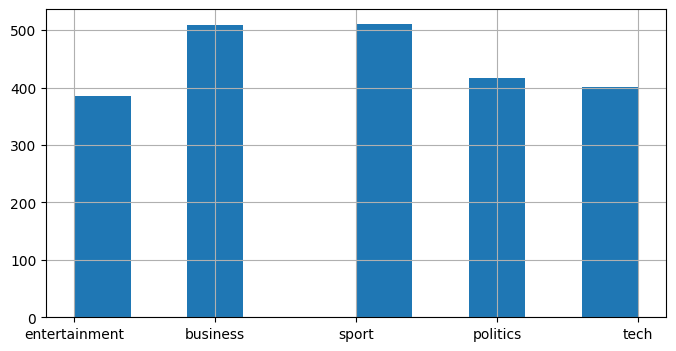

In [13]:
y.hist(figsize = (8,4))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [23]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [28]:
"""
matrix of size (no. of data_samples) X (vocab_size).
N x V

it's sparse matrix representation because it is more efficient, 
especially when most of the values in the matrix are 0s.
"""

X_train   

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 335821 stored elements and shape (1668, 26079)>

In [34]:
"""
< 1% of the matrix contains non-zero values, 
hence this justify the use of sparse matrix representation.
"""

(X_train != 0).sum() / np.prod(X_train.shape)  

np.float64(0.007720063452286601)

In [36]:
model = MultinomialNB()
model.fit(X_train, y_train)

print("train_score", model.score(X_train, y_train))
print("test_score", model.score(X_test, y_test))

train_score 0.9934052757793765
test_score 0.9748653500897666


#### After removal of english stopwords.